### Windows and Anaconda Cmd Line
- You may have to open Anaconda Prompt to access conda through command line!

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Today we explore the concept of *tidy* data introduced by Hadley Wickman (see [here](http://www.jstatsoft.org/v59/i10/paper) for a detailed introduction or Chapter 12 of the textbook)

- Each row is an *observation*
- Each column is a *variable*
- Each entry of the table is a *value*

There are two common instances where this is violated:

- There are variables in the rows
- There are values as columns

In [2]:
# the values column contains multiple types of measurements

(nhl_scorers_050321 <- tribble(
  ~name,             ~types,    ~values,
  #-----------------|----------|------
  "Connor McDavid",   "age",    23,
  "Connor McDavid",   "points", 40,
  "Patrick Kane",     "age",    32,
  "Patrick Kane",     "points", 35,
  "Leon Draisaitl",   "age",    25,
  "Leon Draisaitl",   "points", 35
))

name,types,values
<chr>,<chr>,<dbl>
Connor McDavid,age,23
Connor McDavid,points,40
Patrick Kane,age,32
Patrick Kane,points,35
Leon Draisaitl,age,25
Leon Draisaitl,points,35


In [3]:
# the column headers contain values

(NA_GDP <- tribble(
  ~country,             ~'2018',    ~'2019',
  #-----------------|----------|------
  "United States",   20580.2,   21433.2,
  "Mexico",          1222.35,   1268.87,
  "Canada",          1716.26,   1736.43
))

country,2018,2019
<chr>,<dbl>,<dbl>
United States,20580.20,21433.20
Mexico,1222.35,1268.87
Canada,1716.26,1736.43


- The command ```pivot_wider()``` will move values to column header (resulting in a *wider* dataset)
- The command ```pivot_longer()``` will move columns to values (resulting in a *longer* dataset)

In [4]:
nhl_scorers_050321

name,types,values
<chr>,<chr>,<dbl>
Connor McDavid,age,23
Connor McDavid,points,40
Patrick Kane,age,32
Patrick Kane,points,35
Leon Draisaitl,age,25
Leon Draisaitl,points,35


I want the **names** of my new columns to come from the ```types``` column, and the associated values from the ```values``` column.

In [5]:
nhl_scorers_050321 %>%
    pivot_wider(names_from = types, values_from = values)

name,age,points
<chr>,<dbl>,<dbl>
Connor McDavid,23,40
Patrick Kane,32,35
Leon Draisaitl,25,35


In [6]:
NA_GDP

country,2018,2019
<chr>,<dbl>,<dbl>
United States,20580.20,21433.20
Mexico,1222.35,1268.87
Canada,1716.26,1736.43


I want to take the column headers ```2018``` and ```2019``` and make them values in a new column **year**. Then values of these two columns go to a new column called **GDP**.

In [7]:
NA_GDP %>%
    pivot_longer(c('2018', '2019'), names_to = "year", values_to = "GDP" )

country,year,GDP
<chr>,<chr>,<dbl>
United States,2018,20580.20
United States,2019,21433.20
Mexico,2018,1222.35
Mexico,2019,1268.87
Canada,2018,1716.26
Canada,2019,1736.43


Attempt: Consider the two datasets preloaded into R from the ```tidyverse``` library:

- ```table2```
- ```table4a```

What does the "tidy" version of these datasets look like? Tidy both of them using the two pivot commands we just introduced.

In [11]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [12]:
table2 %>%
    pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [16]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [17]:
table4a %>%
    pivot_longer(c("1999","2000"), names_to = 'year', values_to = "TB_cases")

country,year,TB_cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


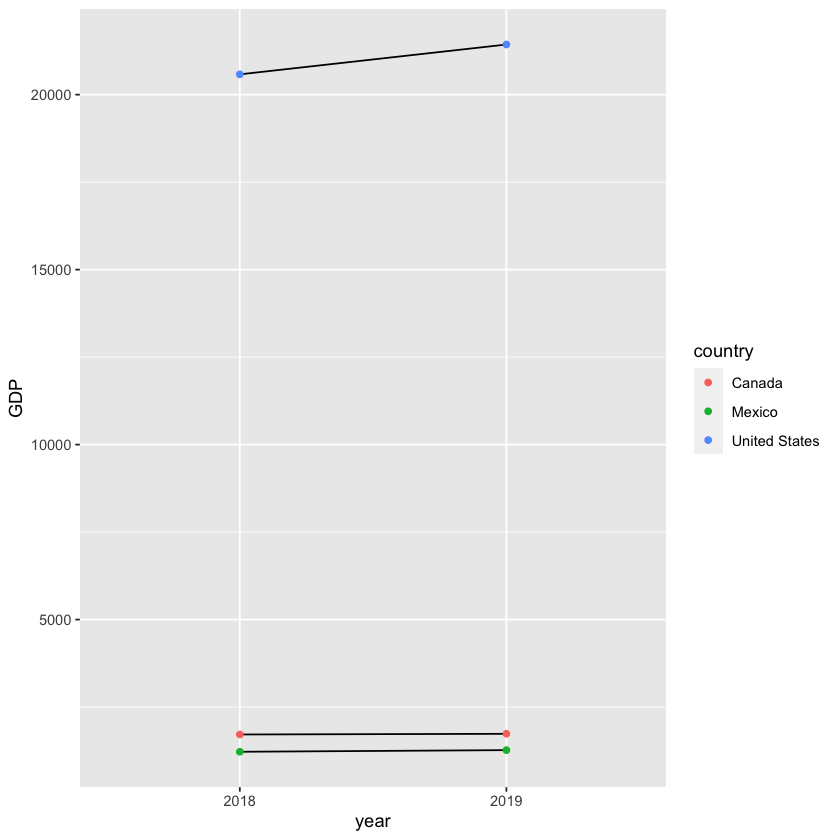

In [18]:
# easier to plot in ggplot2 when time is a column
NA_GDP %>%
    pivot_longer(c('2018', '2019'), names_to = 'year', values_to = "GDP" ) %>%
    ggplot(aes(x = year, y = GDP)) +
    geom_line(aes(group = country)) + 
    geom_point(aes(color = country))

![](https://d33wubrfki0l68.cloudfront.net/8350f0dda414629b9d6c354f87acf5c5f722be43/bcb84/images/tidy-8.png)

![](https://d33wubrfki0l68.cloudfront.net/3aea19108d39606bbe49981acda07696c0c7fcd8/2de65/images/tidy-9.png)

![](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

- It's not always so clearcut
- Which of the following datasets is tidy?

In [19]:
(phone_nos1 <- tribble(
  ~name,             ~'home_phone',    ~'cell_phone',
  #-----------------|-----------------|------
  "John Smith",      "123-124-1111",  "121-121-3212",
  "Jane Doe",        "321-421-7777",  "431-456-1290",
  "Hadley Wickman",  "111-222-8888",  "121-111-9876",
))

name,home_phone,cell_phone
<chr>,<chr>,<chr>
John Smith,123-124-1111,121-121-3212
Jane Doe,321-421-7777,431-456-1290
Hadley Wickman,111-222-8888,121-111-9876


In [20]:
(phone_nos2 <- tribble(
  ~name,             ~'line_type',    ~'phone_nos',
  #-----------------|-----------------|------
  "John Smith",      "home_phone",  "123-124-1111",
  "John Smith",      "cell_phone",  "121-121-3212",
  "Jane Doe",        "home_phone",  "321-421-7777",
  "Jane Doe",        "cell_phone",  "431-456-1290",
  "Hadley Wickman",  "home_phone",  "111-222-8888",
  "Hadley Wickman",  "cell_phone",  "121-111-9876",
))

name,line_type,phone_nos
<chr>,<chr>,<chr>
John Smith,home_phone,123-124-1111
John Smith,cell_phone,121-121-3212
Jane Doe,home_phone,321-421-7777
Jane Doe,cell_phone,431-456-1290
Hadley Wickman,home_phone,111-222-8888
Hadley Wickman,cell_phone,121-111-9876


Exercise: Use ```pivot_longer()``` and ```pivot_wider()``` to convert one table into the other.

The tidiness of the data sometimes depends on what you want to **do** with the data. Are the above observations people or phone lines?
- Demographic dataset of employees or applicants (observations are people)
- Dataset examining spam calls on various phone lines (observations are phone lines)

Good rule of thumb:
- Easier to describe functional relationships between variables (columns)
 * For instance it is easy to use ```mutate()``` to create a ```density``` variable from ```mass``` and ```volume``` variables
- Easier to make comparisons between groups of observations (rows)
 * The ```summarize()``` command makes it easy to compute statistics for all rows sharing a particular value (or values) of a variable (or variables)
 * Anything you'd like to map to a particular aesthetic in ```ggplot``` should be arranged in one column

Attempt:
- The following is a 2-way frequency table describing patient data
- Use ggplot to make a bar graph of how many patients are in each medication group, each bar filled in by age status.
 * Hint: Remember to use ```stat = 'identity'``` to override the y-value of a ```geom_bar``` layer.

In [21]:
(patient_data <- tribble(
  ~medication,        ~'child',   ~'adult',
  #-----------------|----------|----------
  "placebo",         25,        28,
  "medication1",     14,        13,
  "medication2",     15,        16
))

medication,child,adult
<chr>,<dbl>,<dbl>
placebo,25,28
medication1,14,13
medication2,15,16


In the preloaded dataset ```table3```, the cases per year are combined into one *character* variable ```rate```. We can separate this into two columns using the ```separate()``` command.

In [22]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [23]:
# we separate the string given by rate into "cases" and "population", using the character "/"
table3 %>%
    separate(rate, into = c("cases", "population"), sep = "/")

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [24]:
# we can use the mutate command to convert the type of "cases" and "population"
table3 %>%
    separate(rate, into = c("cases", "population"), sep = "/") %>%
    mutate(cases = as.integer(cases), population = as.integer(population))

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [25]:
# or we can use the separate command
table3 %>%
    separate(rate, into = c("cases", "population"), sep = "/", convert = TRUE)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [28]:
# we can also separate by position
# this says, "split after the second character"
table3 %>% 
  separate(year, into = c("century", "year"), sep = 2)

country,century,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


Alternative we can mesh columns together using ```unite()```

In [29]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [37]:
# we specify the name of the new column and then columns we would like to unite
# the default character joining the values together is "_"
table5 %>%
    unite(date, century, year)

country,date,rate
<chr>,<chr>,<chr>
Afghanistan,19_99,745/19987071
Afghanistan,20_00,2666/20595360
Brazil,19_99,37737/172006362
Brazil,20_00,80488/174504898
China,19_99,212258/1272915272
China,20_00,213766/1280428583


In [35]:
table5 %>%
    unite(date, century, year, sep = "")

country,date,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


Missing Values are sometimes *implicit* in our data

In [43]:
(stocks <- tibble(
  year   = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
  qtr    = c(   1,    2,    3,    4,    2,    3,    4),
  returns = c(1.88, 0.59, 0.35,   NA, 0.92, 0.17, 2.66)
))

year,qtr,returns
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [44]:
# the complete command forces there to be an observation for each possible combination of the specified columns
stocks %>%
    complete(year, qtr)

year,qtr,returns
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [45]:
# In data entry, often missing values indicate the the previous value should be repeated 
(treatment <- tribble(
  ~ person,           ~ treatment, ~response,
  "Derrick Whitmore", 1,           7,
  NA,                 2,           10,
  NA,                 3,           9,
  "Katherine Burke",  1,           4
))

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
NA,2,10
NA,3,9
Katherine Burke,1,4


In [46]:
# this can rectified with the fill() command
treatment %>%
    fill(person)

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4
